# DSA_Features Auto Encoder

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("C:/Users/Administrator/dataset/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
df.describe()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
count,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,...,9120.000000,9.120000e+03,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9.120000e+03,9120.000000,9120.000000
mean,7.765766,14.625536,3.602974,17.807013,2.454290,0.305587,-0.811036,1.801847,-3.704204,2.049747,...,0.111347,1.818862e-02,0.105897,-0.055440,0.064504,0.169687,-0.052866,7.624694e-03,0.059342,-0.089861
std,3.758022,11.823448,5.622855,45.188787,3.432895,0.768360,2.201692,4.177165,3.982579,3.908675,...,0.362373,2.382393e-02,0.083518,0.526959,0.346660,0.360190,0.359712,1.903445e-02,0.064059,0.619636
min,-11.575660,-4.758700,-99.715000,0.000135,0.011633,-7.826631,-9.782885,-9.703600,-49.941000,0.000141,...,-0.901760,3.044156e-07,0.000552,-3.693948,-0.912397,-0.910830,-1.126000,2.960874e-07,0.000544,-5.111532
25%,8.374161,9.523200,0.000000,0.036855,0.191977,-0.161535,-1.134192,0.172375,-4.837875,0.012121,...,-0.111835,5.683172e-04,0.023839,-0.343123,-0.156271,-0.035821,-0.326125,2.227543e-04,0.014925,-0.402781
50%,9.186328,12.549500,5.757900,2.241468,1.497153,0.275042,-0.375678,1.571750,-2.470150,0.737663,...,0.184470,1.078612e-02,0.103856,-0.075786,0.086285,0.210825,-0.040447,1.813539e-03,0.042586,-0.092036
75%,9.515573,15.843250,7.649075,6.680571,2.584680,0.845410,0.127612,3.005450,-1.279725,1.900426,...,0.315962,2.740661e-02,0.165549,0.177076,0.295415,0.422270,0.206933,6.927870e-03,0.083234,0.228493
max,10.713139,93.694000,9.749000,392.898630,19.821671,9.070164,7.051530,41.013000,2.656400,54.332000,...,0.969020,3.041940e-01,0.551538,5.035185,1.020691,1.042600,0.999440,2.790198e-01,0.528223,3.560828


In [4]:
np.unique(df['activity'], return_counts=True)

(array(['ascendingStairs', 'basketBall', 'crossTrainer',
        'cyclingHorizontal', 'cyclingVertical', 'decendingStairs',
        'jumping', 'lyingBack', 'lyingRigh', 'movingInElevator', 'rowing',
        'runningTreadmill', 'sitting', 'standing',
        'standingInElevatorStill', 'stepper', 'walkingLot',
        'walkingTreadmillFlat', 'walkingTreadmillIncline'], dtype=object),
 array([480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480], dtype=int64))

In [5]:
df.isna().values.any()

False

In [6]:
df = df.loc[df['activity'].isin(['lyingRigh', 'lyingBack', 'jumping'])]
df['activity'].value_counts()

lyingBack    480
lyingRigh    480
jumping      480
Name: activity, dtype: int64

In [7]:
df.shape

(1440, 272)

In [8]:
# Null값 확인
df.isna().values.any()

False

In [9]:
# lyingRigh, lyingBack 정상 (normal) jumping(abnormal)을 비정상 데이터로 사용
abnormal = df[df.activity == 'jumping']
normal = df[df.activity.isin(['lyingRigh', 'lyingBack'])]

abnormal.shape, normal.shape

((480, 272), (960, 272))

In [10]:
data = df.drop(['activity', 'people'], axis=1)
data.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.41744,-0.59561,0.001016,...,0.56276,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.40372,-0.63184,0.001297,...,0.56394,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.42616,-0.59561,0.000863,...,0.56445,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.30877,-0.55225,0.003587,...,0.56420,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.38900,-0.53714,0.001059,...,0.56455,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271


C:\Users\Administrator\AppData\Local\Temp\ipykernel_24808\920020661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df['activity'].apply(lambda x: 'normal' if x.startswith('lying') else 'abnormal')


normal      960
abnormal    480
Name: class, dtype: int64

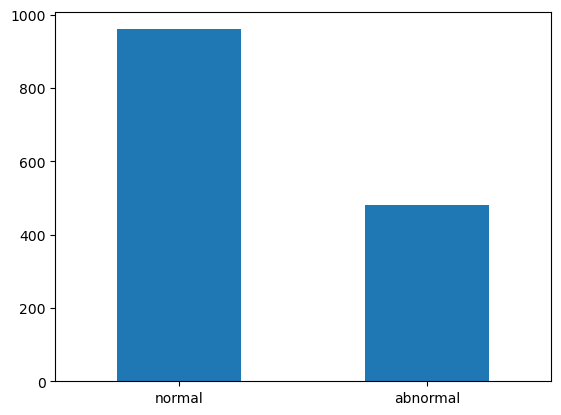

In [11]:
df['class'] = df['activity'].apply(lambda x: 'normal' if x.startswith('lying') else 'abnormal')
df.columns

classes = pd.value_counts(df['class'], sort = True)
classes.plot(kind = 'bar', rot=0)

df['class'].value_counts()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# normal Train data
X_train = normal.drop(['activity', 'people'], axis=1)

# mixed test data
X_mix = df.iloc[:, :-1].drop(['activity', 'people'], axis=1)
y_mix = df.iloc[:, -1]
y_mix = le.fit_transform(y_mix)

In [13]:
# 매핑 딕셔너리 생성 (레이블을 인덱스로 변환한 매핑)
mapping = {label: idx for idx, label in enumerate(le.classes_)}
print(mapping)

{'abnormal': 0, 'normal': 1}


In [14]:
#데이터 정규화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_mix = ss.transform(X_mix)

### AutoEncoder train model

In [15]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [16]:
# 입력 차원 설정
input_dim = X_train.shape[1]

# AE 모델 정의
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
bottleneck = Dense(16, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(bottleneck)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

# 모델 인스턴스 생성
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# 모델 컴파일
autoencoder.compile(optimizer=Adam(), loss='mse')

# 모델 요약
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          34,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 270)                 │          34,830 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,358 (356.87 KB)

 Trainable params: 91,358 (356.87 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=32, 
                          shuffle=True, 
                          callbacks=[early_stopping_cb],
                          validation_split = 0.1)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.9677 - val_loss: 0.6472
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7814 - val_loss: 0.5815
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3083 - val_loss: 0.5675
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2798 - val_loss: 0.5497
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1023 - val_loss: 0.5473
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8845 - val_loss: 0.5403
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9738 - val_loss: 0.5465
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9392 - val_loss: 0.5435


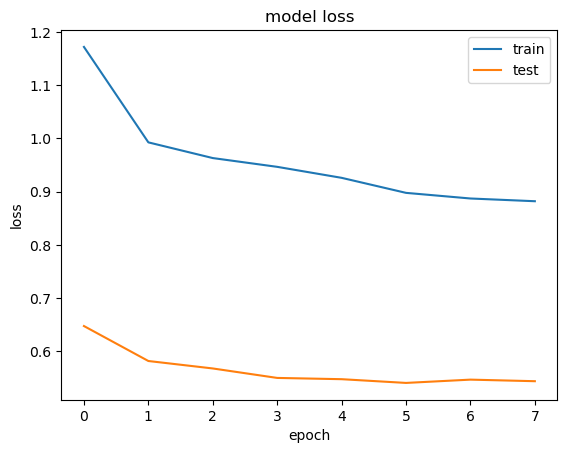

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [19]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_mix)
mse = np.mean(np.abs(X_mix - predictions), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,'true_class': y_mix})
error_df.describe()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,reconstruction_error,true_class
count,1440.000000,1440.000000
mean,65.176322,0.666667
std,105.575785,0.471568
min,0.280665,0.000000
25%,0.375758,0.000000
50%,0.442245,1.000000
75%,117.558929,1.000000
max,606.090415,1.000000


In [20]:
error_df.head()

,reconstruction_error,true_class
0,0.326532,1
1,0.336537,1
2,0.317771,1
3,0.353198,1
4,0.321807,1


In [21]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 15

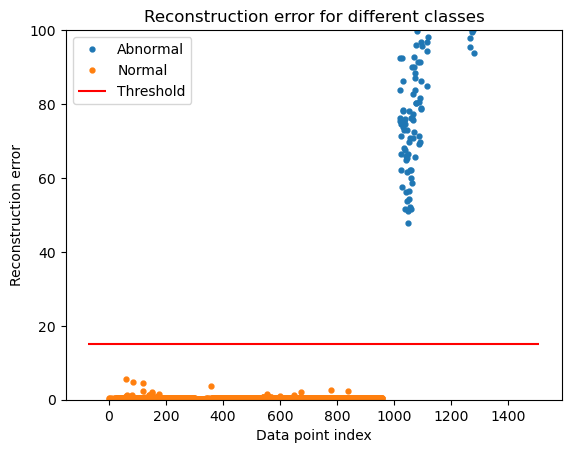

In [22]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
ax.set_ylim(0, 100)

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 0 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

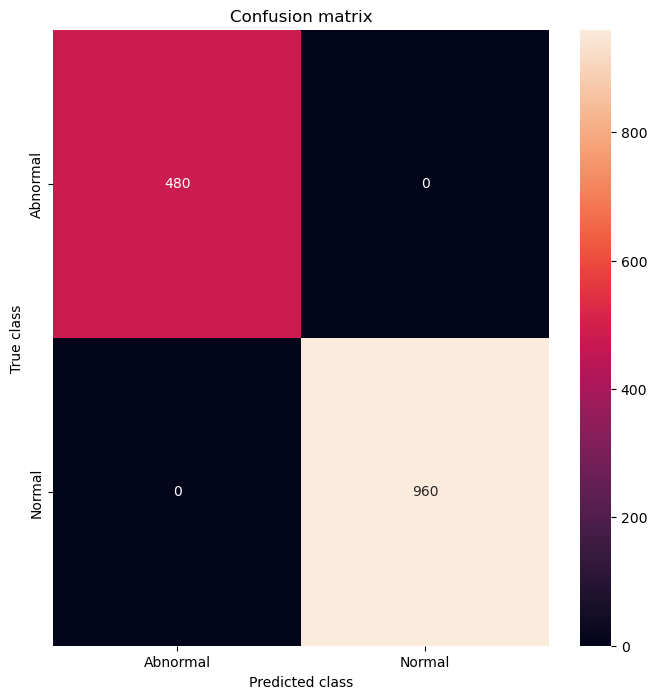

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      1.00      1.00       960

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [0 if e > threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=['Abnormal', 'Normal'], yticklabels=['Abnormal', 'Normal'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))